# Proyecto N°3: Series de Tiempo - Flujo Vehicular por Unidades de Peaje AUSA
***

### *Objetivo del Proyecto:*
##### "Con el desarrollo del presente proyecto se busca desarrollar e implementar un modelo para predecir el flujo vehicular en una autopista de la Ciudad de Buenos Aires, Argentina, para el último trimestre de 2019 "
***

El siguiente modelo se desarrollará contemplando los siguientes criterios: 
- **Autopista seleccionada:** Autopista Dr. Arturo Umberto Illia.
- **Periodo de tiempo contemplado en la base de datos disponible:** Años 2017 a 2019, inclusive. 
- **Periodo de tiempo a pronosticar:** Último trimestre de 2019. 
- **Filtrado de los datos a realizar:** El modelo será entrenado considerando la cantidad de pasos/cruces realizados por los vehículos que han circulado por la autopista Dr. Arturo U. Illia en ambos sentidos de circulación y que hayan abonado en efectivo. 

##### Estructura del proyecto:

El proyecto se separa en 4 partes: 
- **Parte A:** Código preliminar de preprocesamiento de datos aportado por Acámica. 
- **Parte B:** Exploración de Datos.
- **Parte C:** Modelo de Machine Learning.
- **Partde D:** Investigación. 


##### Descripción de las columnas del Dataset:
- **periodo**: año del dset 
- **fecha**: año dia mes
- **hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)
- **hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)
- **dia**: dia de la semana 
- **estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)
- **sentido**: Centro o Provincia
- **tipo_vehiculo**: Liviano o Pesado
- **forma_pago**: Hay varias y varian entre los años.
- **cantidad_pasos**: Cantidad de vehiculos

#### Repositorio: 
**Link:** https://github.com/gaceballos05/Acamica_DataScienceCareer_Proyecto3_Series_de_tiempo.git
***
### Librerías por utilizar.

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### PARTE A: Preprocesamiento de datos aportado por Acamica.

#### 1. Carga y preparación del dataset 
*Nota: Este código ha sido proporcionado en el Notebook del proyecto y no se ha sido modificado.*

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


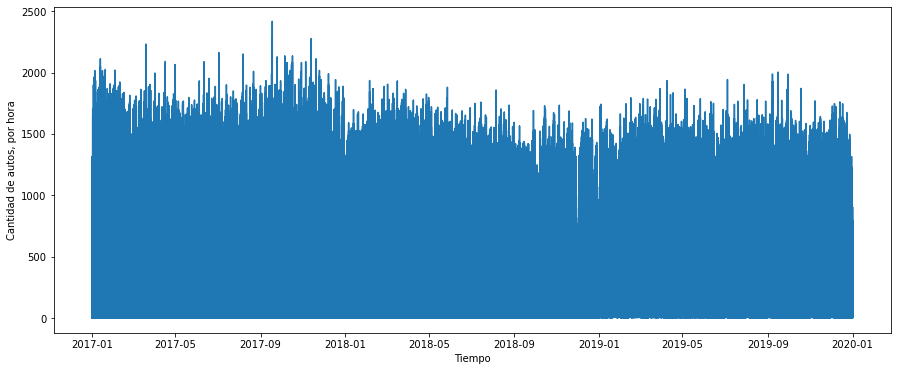

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


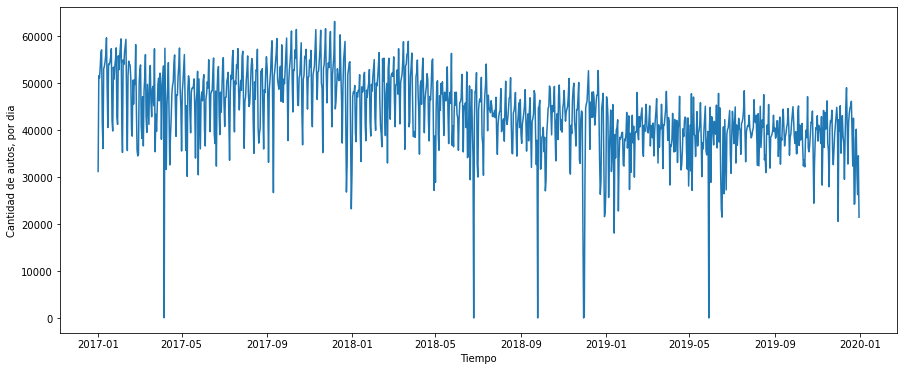

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### PARTE B: Exploración de datos. 

A continuación, se realizará el análisis exploratorio del dataset proporcionado. Para ello se procederá a dar respuesta a las siguientes preguntas: 
1. ¿Cómo se encuentra constituido el dataset? 
2. ¿Cuál es el formato de los atributos del dataset? ¿Estos son los adecuados para realizar los pronósticos o deben ser modificados?
3. ¿El dataset posee valores atípicos?
4. ¿El dataset contiene valores o fechas faltantes? 
5. Considerando los filtro previamente aplicados:
    * ¿Cuántos vehículos han circulado por la autopista Illia en el periodo 2017-2019? ¿En qué dirección han circulado estos vehículos?
    * Considerando el atributo `tipo_vehiculo`: 
        - ¿Qué tipos de vehiculos han circulado por la autopista Illia? ¿Qué proporción sobre el total de vehículos representa cada uno de ellos?
        - ¿Cómo ha sido la circulación de cada uno de estos tipos de vehiculos por mes? ¿Cúal es el promedio de vehículos que circularon por día de la semana? ¿Existe algún periodo de tiempo en el cual la circulación de vehículos pesados se incremente sustancialmente? ¿Qué sucede con los vehículos livianos?
        - ¿La cantidad promedio de vehiculos pesados que circula con destino a Ciudad de Bs As es mayor que la cantidad promedio que circula con destino a Provincia de Bs As?*
    * ¿Cómo es el comportamiento de la serie de tiempo por mes y año? ¿Existe algún patrón en este comportamiento?
    * ¿Cómo se comporta la serie por día y sentido de circulación? ¿Existe algún patrón en este comportamiento?
    * ¿Cómo es el comportamiento de la serie de tiempo si se descompone por sus sentidos de circulación? ¿Alguno de los sentidos de circulación posee una mayor cantidad de vehículos?
6. Considerando los distintos componentes que conforman una serie de tiempo: 
    * ¿La serie de tiempo posee una tendencia definida? 
    * ¿Cúales pueden ser las principales razones de esta tendencia?
    * ¿Es una serie de tiempo con estacional (Seasonality)?
    * ¿La serie de tiempo presenta un proceso estacionario (Stationary)?
    * ¿Cómo se comporta la autocorrelación en esta serie de tiempo?

A medida que se dé respuesta a estas preguntas, y de ser necesario, se realizará el preprocesamiento de los datos según se considere más adecuado. 

#### 1. ¿Cómo se encuentra constituido el dataset? 

A partir de las líneas de código correspondiente a la sección "Carga y preparación del dataset" fue posible observar que el dataset contiene registros con la cantidad de vehículos que han circulado (por día y hora) a través del peaje de la  *Autopista Dr. Arturo Umberto Illia* en el período 2017-2019. 

Respecto a esta autopista, se debe destacar que corresponde a uno de los principales acceso al centro de la ciudad de Buenos Aires en Argentina. 

Así, con este dataset fue posible acceder a los registros de circulación vehicular tanto en dirección al centro de la ciudad como, también, hacia la provincia de Buenos Aires. Asimismo, como se menciono anteriormente, estos registros corresponden sólo a aquellos pasos realizados por clientes han realizados su pago en efectivo, excluyéndose otras modalidades de pago como telepase, entre otros.

In [17]:
df = dataset.copy()
df.head(5)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01


#### 2. ¿Cúal es el formato de los atributos del dataset? ¿Estos son los adecuados para realizar los prónosticos o deben ser modificados?

El dataset `df` posee cinco (5) columnas. Tres (3) de ellas tienen formato tipo `Series`, mientras que las restantes corresponden a los formatos `int` y `datetime`. 

Se considera que no todos estos formatos son los adecuados para el entrenamiento de un modelo de machine learning. De esta manera, si se desea incluir las variables categóricas en el entrenamiento del modelo, previamente se las debería transformar. Esto puede ser posible mediante encoding, de forma tal que cada categoría sea representada por un número. 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


In [19]:
print(type(df.dia))
print(type(df.sentido))
print(type(df.tipo_vehiculo))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### 3. ¿El dataset posee valores atípicos?
Al corroborar la serie de tiempo diaria se puede observar que existen una serie de valores atípicos. Al utilizar el criterio de las 3 sigmas para aplicar un filtrado e identificarlos correctamente, se pudo detectar que:
- Algunos de ellos corresponden a registros cuya `cantidad_pasos` figura con valor cero (0). Estos valores serán tratados posteriormente como valores faltantes. 


- Otros registros poseen un valor superior a cero pero muy inferior a los restantes valores de la serie. Respecto a ellos, se debe destacar que sólo se pudo corroborar que el día 27 de Mayo de 2019 se realizó la inauguración del Paseo del Bajo y su empalme, el cual pudo haber afectado drásticamente el flujo vehicular en la autopista bajo análisis durante la realización del acto oficial. Sin embargo, las fechas detectadas no coinciden con esta antes mencionada, por lo cual no fue posible atribuir a estos valores una causa específica (por ejemplo, la disminución en la circulación vehiculo por la implementación de obras públicas o medidas de fuerza / huelgas). Ello ha llevado a concluir que los mismos se originaron por una falla al momento de su registro. 

In [20]:
# Resampleo de la serie de tiempo conservando la columna fecha.
df_diario = df.resample('D', on = 'fecha').sum().reset_index()
df_diario.head(2)

,fecha,cantidad_pasos
0,2017-01-01,31183
1,2017-01-02,51568


In [21]:
# Estadísticos principales.
df_diario.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


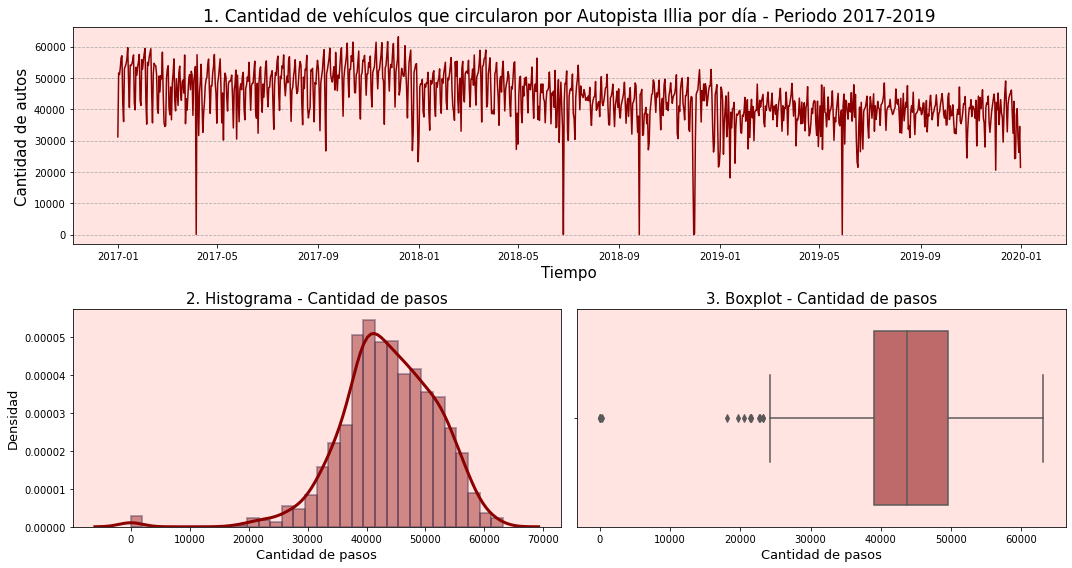

In [22]:
# Comprobar la presencia de valores atípicos.
fig1 = plt.figure(figsize = (15,8))

ax1 = fig1.add_subplot(2,1,1)
ax1.plot(df_diario.fecha, df_diario.cantidad_pasos, color='darkred')
ax1.set_title('1. Cantidad de vehículos que circularon por Autopista Illia por día - Periodo 2017-2019', fontsize = 17)
ax1.set_xlabel('Tiempo', fontsize = 15)
ax1.set_ylabel('Cantidad de autos', fontsize = 15)
ax1.set_facecolor('mistyrose')
ax1.grid(axis = 'y', linestyle='--')

ax2 = fig1.add_subplot(2,2,3)
ax2 = sns.distplot (df_diario.cantidad_pasos, kde_kws = {"color": "darkred", "linewidth": 3}, 
                    hist_kws={"color":"darkred", "linewidth": 2, 
                              "edgecolor" : '#453050'})

ax2.set_title('2. Histograma - Cantidad de pasos', fontsize = 15)
ax2.set_xlabel('Cantidad de pasos', fontsize = 13)
ax2.set_ylabel('Densidad', fontsize = 13)
ax2.set_facecolor('mistyrose')
ax2.ticklabel_format(axis = 'y', useOffset=False, style='plain')

ax3 = fig1.add_subplot(2,2,4)
ax3 = sns.boxplot(df_diario.cantidad_pasos, color = 'indianred')
ax3.set_title('3. Boxplot - Cantidad de pasos', fontsize = 15)
ax3.set_xlabel('Cantidad de pasos', fontsize = 13)
ax3.set_facecolor('mistyrose')

plt.tight_layout()
plt.show()

In [23]:
# Filtrado de valores atípicos considerando el criterio de 3 sigmas.
mean = df_diario.cantidad_pasos.mean()
std = df_diario.cantidad_pasos.std()

umbral_max = mean + 3 * std
umbral_min = mean - 3 * std

print('Umbral Máximo: {max} pasos'.format(max = round(umbral_max)))
print('Umbral Mínimo: {min} pasos'.format(min = round(umbral_min)))

mask = (df_diario.cantidad_pasos < umbral_min) | (df_diario.cantidad_pasos > umbral_max)
df_diario[mask]

Umbral Máximo: 68291 pasos
Umbral Mínimo: 19135 pasos


,fecha,cantidad_pasos
95,2017-04-06,40
540,2018-06-25,0
632,2018-09-25,0
698,2018-11-30,0
699,2018-12-01,350
742,2019-01-13,18076
878,2019-05-29,0


#### 4. ¿El dataset contiene valores o fechas faltantes? 
*Nota: Al analizar el periodo 2017-2019 se debe resaltar que el mismo no posee ningún año bisiesto. Ante esto, al realizar el resampleo del dataset, se debería esperar que el mismo cuente con 1095 registros.*

Al comprobar el tamaño del dataset se observa que el mismo posee 1095 registros diarios. Además, se puede afirmar que el dataset `df` no posee fechas faltantes. Sin embargo, a partir de lo detectado en el apartado de valores atípicos, el dataset posee registros cuyo valor es igual a cero, por lo cual pueden ser considerados como valores faltantes. 

In [24]:
# Comprobar valores nulos sobre el dataset sin resampleo.
df.isnull().sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

In [25]:
# Comprobar si hay fechas faltantes en el dataset resampleado. 
df_diario['date_check'] = df_diario.fecha.diff()

print(df_diario.date_check.value_counts())
print('-'*50)
print('El dataset resampleado posee {d} registros.'.format(d = len(df_diario)))
df_diario = df_diario.drop(['date_check'], axis = 1)

1 days    1094
Name: date_check, dtype: int64
--------------------------------------------------
El dataset resampleado posee 1095 registros.


#### 5. Considerando los filtro previamente aplicados:
    
* ***¿Cúantos vehiculos han circulado por la autopista Illia en el periodo 2017-2019? ¿En qué dirección han circulado estos vehículos?***

Bajo las condiciones de filtrado, en total han circulado 47.865.581 de vehiculos. De ellos, el 51,62% han circulado con dirección Centro, mientras que los restantes 48,38% lo han realizado con dirección a Provincia de Bs As.

In [26]:
# Total de vehiculo que han circulado en el periodo de tiempo de análisis. 
print('Cantidad de vehiculos que han transitado por el Peaje de Autopista Illia pagando en Efectivo - Periodo 2017-2019:')
print('{v} vehiculos.'.format(v = df.cantidad_pasos.sum()))

Cantidad de vehiculos que han transitado por el Peaje de Autopista Illia pagando en Efectivo - Periodo 2017-2019:
47865581 vehiculos.


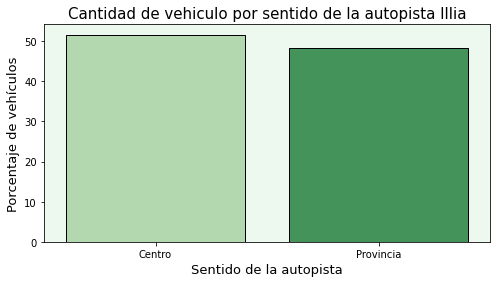

,sentido,cantidad_pasos,%
0,Centro,24707366,51.62
1,Provincia,23158215,48.38


In [27]:
# Cantidad total de vehículos que han circulado en cada sentido. 
pd.options.display.float_format = '{:.2f}'.format

flujo_sentido = df.groupby('sentido').cantidad_pasos.sum().reset_index()
flujo_sentido['%'] = flujo_sentido['cantidad_pasos'].apply(lambda x: x / float(flujo_sentido.cantidad_pasos.sum())*100)

fig2 = plt.figure(figsize = (8,4))
ax = fig2.add_subplot()
ax = sns.barplot(x='sentido', y='%', data = flujo_sentido, edgecolor = 'black', palette = 'Greens')
ax.set_title('Cantidad de vehiculo por sentido de la autopista Illia', fontsize = 15)
ax.set_xlabel('Sentido de la autopista', fontsize = 13)
ax.set_ylabel('Porcentaje de vehículos', fontsize = 13)
ax.set_facecolor('#edf8ee')
plt.show()

flujo_sentido

* ***Considerando el atributo `tipo_vehiculo`:*** 

*A. ¿Qué tipos de vehiculos han circulado por la autopista Illia? ¿Qué proporción sobre el total de vehículos representa cada uno de ellos?*

A partir del dataset filtrado, es posible detectar 2 tipos de unidades: vehiculos livianos y pesados. 

Además, se ha corroborado que la mayor cantidad de vehiculos que han circulado por esta autopista corresponden a vehiculos livianos con el 96,81% sobre el total. Mientras que el 3,19% restante ha correspondido a vehículos pesados.

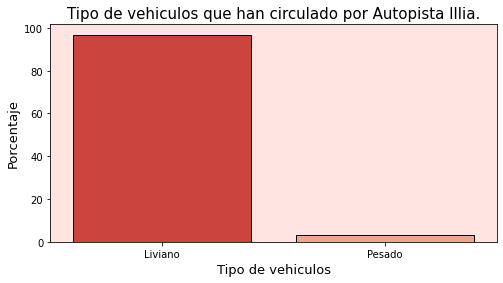

,tipo_vehiculo,cantidad_pasos,%
0,Liviano,46338529,96.81
1,Pesado,1527052,3.19


In [28]:
# Cantidad total de vehiculos que han circulado por tipo de unidad.
tipo_vehiculo = df.groupby('tipo_vehiculo').cantidad_pasos.sum().reset_index()
tipo_vehiculo ['%'] = tipo_vehiculo['cantidad_pasos'].apply(lambda x: x / float(tipo_vehiculo.cantidad_pasos.sum())*100)

fig3 = plt.figure(figsize = (8,4))
ax = fig3.add_subplot()
ax = sns.barplot(x='tipo_vehiculo', y='%', data = tipo_vehiculo, edgecolor = 'black', palette = 'Reds_r')
ax.set_title('Tipo de vehiculos que han circulado por Autopista Illia.', fontsize = 15)
ax.set_xlabel('Tipo de vehiculos', fontsize = 13)
ax.set_ylabel('Porcentaje', fontsize = 13)
ax.set_facecolor('mistyrose')
plt.show()

tipo_vehiculo

*B. ¿Cómo ha sido la circulación de cada uno de estos tipos de vehiculos por mes? ¿Cúal es el promedio de vehículos que circularon por día de la semana? ¿Existe algún periodo de tiempo en el cual la circulación de vehículos pesados se incremente sustancialmente? ¿Qué sucede con los vehículos livianos?*

A continuación, se procede a realizar los agrupamientos necesarios para dar respuesta a las preguntas anteriores. El mismo se realiza a través de la función de la librería pandas `group_by` y de una función creada con el fin de pivotear y facilitar el uso de los resultados obtenidos. Luego, se procede a realizar los gráficos correspondientes a los resultados obtenidos y dejar registro de las conclusiones a las que estos permiten arribar. 

In [29]:
def pivotear_tabla (dataset, columna, fila, valor):
    '''Función creda para facilitar el reacomodamiento y visualización de las variables bajo análisis
    luego de haber realizado algún tipo de agrupamiento. El misma considera como entrada el dataset agrupado, 
    y una serie de cadenas correspondientes a la columna, indice y valores que se desea reacomodar'''
    
    df_pivot = dataset.pivot(columns = columna, index = fila, values = valor).reset_index(drop = True)
    
    return df_pivot

In [30]:
# Transformación de dataframe para obtener cantidad de pasos por mes, por año y por tipo de vehículo.
df1 = df.copy()
df1['Mes'] = df1['fecha'].dt.month
df1['Año'] = df1['fecha'].dt.year

# Agrupamiento por mes, por año y por tipo de vehiculo.
circulacion = df1.groupby(['Año','Mes', 'tipo_vehiculo']).cantidad_pasos.sum().reset_index()

circ_liv = circulacion[circulacion.tipo_vehiculo == 'Liviano']
circ_liv_pivot = pivotear_tabla(circ_liv, 'Año', 'Mes', 'cantidad_pasos')

circ_pesado = circulacion[circulacion.tipo_vehiculo == 'Pesado']
circ_pesado_pivot = pivotear_tabla(circ_pesado, 'Año', 'Mes', 'cantidad_pasos')

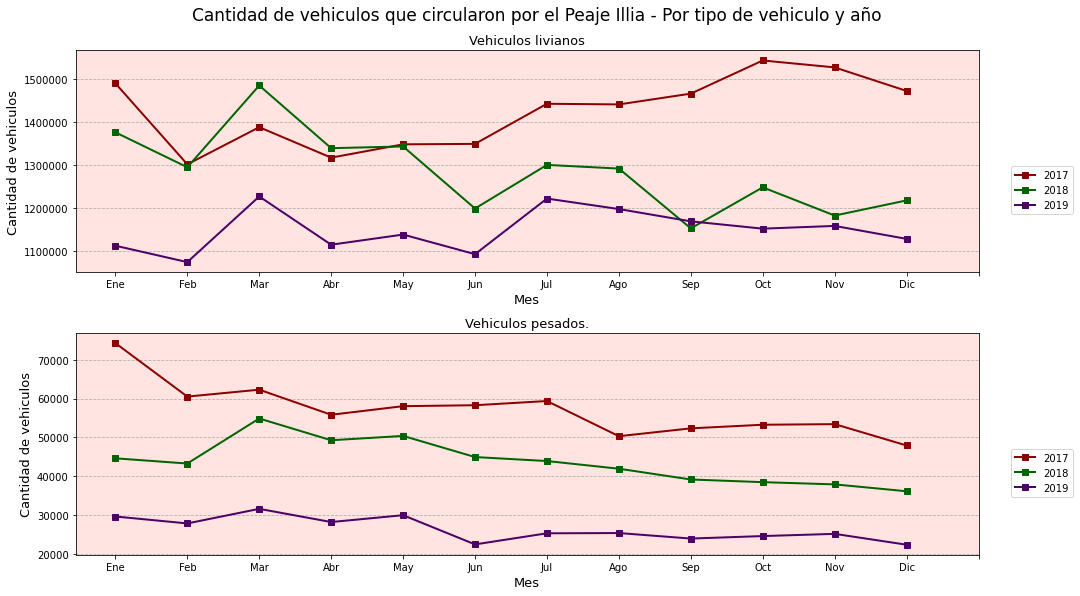

In [31]:
# Gráfico de las series de tiempo obtenidas por mes y tipo de vehículo. 
fig4 = plt.figure(figsize = (15, 8))

# Vehículos livianos.
ax1 = fig4.add_subplot(2,1,1)
ax1.plot(circ_liv_pivot[2017], linewidth = 2, marker = 's', color = 'darkred', label = '2017')
ax1.plot(circ_liv_pivot[2018], linewidth = 2, marker = 's', color = 'darkgreen', label = '2018')
ax1.plot(circ_liv_pivot[2019], linewidth = 2, marker = 's', color = '#4d0066', label = '2019')
ax1.set_xlabel('Mes', fontsize = 13)
ax1.set_ylabel('Cantidad de vehiculos', fontsize = 13)
ax1.set_title('Vehiculos livianos', fontsize = 13)
ax1.legend(bbox_to_anchor=(1.11, 0.5))
ax1.set_xticks(range(0,13))
ax1.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax1.ticklabel_format(axis = 'y', useOffset=False, style='plain')
ax1.grid(axis = 'y', linestyle='--')
ax1.set_facecolor('mistyrose')

# Vehículos pesados.
ax2 = fig4.add_subplot(2,1,2)
ax2.plot(circ_pesado_pivot[2017], linewidth = 2, marker = 's', color = 'darkred', label = '2017')
ax2.plot(circ_pesado_pivot[2018], linewidth = 2, marker = 's', color = 'darkgreen', label = '2018')
ax2.plot(circ_pesado_pivot[2019], linewidth = 2, marker = 's', color = '#4d0066', label = '2019')
ax2.set_xlabel('Mes', fontsize = 13)
ax2.set_ylabel('Cantidad de vehiculos', fontsize = 13)
ax2.set_title('Vehiculos pesados.', fontsize = 13)
ax2.legend(bbox_to_anchor=(1.11, 0.5))
ax2.set_xticks(range(0,13))
ax2.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax2.ticklabel_format(axis = 'y', useOffset=False, style='plain')
ax2.grid(axis = 'y', linestyle='--')
ax2.set_facecolor('mistyrose')

plt.suptitle('Cantidad de vehiculos que circularon por el Peaje Illia - Por tipo de vehiculo y año',y = 1.03, fontsize=17)
plt.tight_layout()
plt.show()

A partir de estos gráficos es posible destacar que: 

- *Gráfico de Vehiculos Livianos:*

    - La cantidad de vehículos que han circulado por esta autopista ha ido disminuyendo año a año. Durante los primeros 5 meses de los años 2017 y 2018, la cantidad de vehiculos livianos que han circulado es bastante similar.  Sin embargo, el flujo vehicular empieza a caer a partir de Junio. Por último, se observa una leve recuperación durante los últimos 4 meses de 2019, acercándose a valores similares a los vistos en el mismo periodo en 2018. Estas variaciones pueden estar vinculadas a las obras públicas llevadas a cabo sobre esta autopista durante el periodo de análisis. 
    - Se detecta un patron muy similar en las 3 series para el periodo Enero-Mayo, donde la suma total de vehículos se comporta casi de manera idéntica, pese a la reducción de la cantidad de vehiculo livianos que circularon. Estas subseries presenta una caída abrupta en el mes de Febrero, repunte en el mes de Marzo, una nueva caída en Abril y cierta estabilidad hasta Mayo. 
    - En todas las series se observa un incremento en la cantidad de vehículos que circularon por esta autopista en los meses de julio y agosto, el cual puede coincidir con los recesos invernales de los colegios y posibles vacaciones familiares por periodos breves de tiempo. 


- *Gráfico de Vehiculos Pesados:*

    - Al igual que con los vehículos livianos, se observa una disminución paulatina en la cantidad de vehículos pesados que utiliaron esta autopista durante el periodo de análisis. Sin embargo, en estas unidades no se observa un incremento paulatino para finales de 2019. Esto puede deberse al uso de rutas alternativas más eficientes o decisiones llevadas a cabo por las compañias propietarias de estas unidades con el fin de evitar posibles inconvenientes en la prestación de sus servicios. 
    - Al igual que en la serie de vehículos livianos, se detecta un patron muy similar en las 3 series para el periodo Enero-Mayo, siendo el correspondiente al año 2019 el más estable. 

Una posible hipotesis que surge de estos gráficos, consiste en la posibilidad de que la caída en la cantidad de vehiculos registrados que han circulado por esta autopista luego de su reinauguración en 2019 se deba a un cambio en los hábitos de consumo de los clientes, abonando las tarifas correspondientes con algún otro medio de pago (por ejemplo, telepase). 

A continuación, se procede a analizar la distribución de las unidades que circularon por esta autopista considerando los días de la semana:

In [32]:
# Cantidad de vehiculo promedio por dia de la semana.
circ_semana = df1.groupby(['dia', 'tipo_vehiculo']).cantidad_pasos.mean().reset_index()
circ_semana_pivot = pivotear_tabla(circ_semana, 'tipo_vehiculo', 'dia', 'cantidad_pasos')

In [33]:
circ_semana_pivot

tipo_vehiculo,Liviano,Pesado
0,453.66,6.10
1,565.98,11.39
2,516.82,10.23
3,531.36,10.95
4,550.02,11.34
5,504.61,8.19
6,591.22,11.68


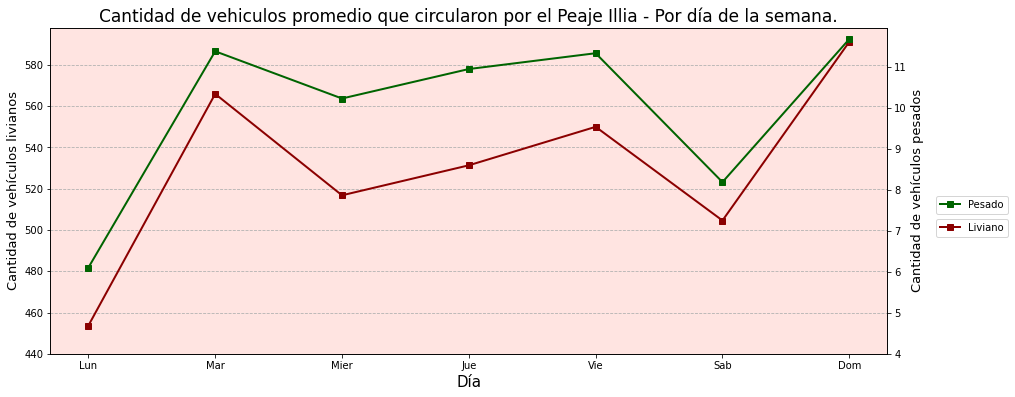

In [34]:
# Gráfico de las series de tiempo obtenidas por día de la semana y tipo de vehículo.
fig5 = plt.figure(figsize = (15, 6))
ax1 = fig5.add_subplot()
ax1.plot(circ_semana_pivot['Liviano'], linewidth = 2, marker = 's', color = 'darkred', label = 'Liviano')
ax1.set_title('Cantidad de vehiculos promedio que circularon por el Peaje Illia - Por día de la semana.', fontsize = 17)
ax1.set_xlabel('Día', fontsize = 15)
ax1.set_ylabel('Cantidad de vehículos livianos', fontsize = 13)
ax1.set_yticks(range(440, 600, 20))
ax1.legend(bbox_to_anchor=(1.15, 0.43))

ax2 = ax1.twinx()
ax2.plot(circ_semana_pivot['Pesado'], linewidth = 2, marker = 's', color = 'darkgreen', label = 'Pesado')
ax2.set_ylabel('Cantidad de vehículos pesados', fontsize = 13)
ax2.set_yticks(range(4, 12, 1))
ax2.legend(bbox_to_anchor=(1.15, 0.5))


ax1.set_xticks(range(0,7))
ax1.set_xticklabels(['Lun', 'Mar', 'Mier', 'Jue', 'Vie', 'Sab', 'Dom'])
ax1.ticklabel_format(axis = 'y', useOffset=False, style='plain')
ax1.grid(axis = 'y', linestyle='--')
ax1.set_facecolor('mistyrose')
plt.show()

Respecto a estas series, se puede observar que la cantidad de vehículos livianos y pesados se compartan de manera casi identica. Esto se observa en el paralelismo que presentan las curvas para cada uno de los días de la semana. 
La diferencia radica en la cantidad de unidades pesas que circulan entre viernes y domingo. Esto coincide con las restricciones a la circulación de camiones previstas por la Agencia Nacional de Seguridad Vial (ANSV).

*C. ¿La cantidad promedio de vehiculos pesados que circula con destino a Ciudad de Bs As es mayor que la cantidad promedio que circula con destino a Provincia de Bs As?*

Al analizar el gráfico siguiente, es posible detectar que la cantidad promedio de vehículos pesados que circula con sentido a la Ciudad de Bs As es mayor que aquellos que circulan con sentido a la provincia de Bs As. Esto puede deberse, entre otras, a estas razones:
- Colectivos de larga distancia con destino a la terminal de Retiro en la Ciudad de Bs As y que luego se dirigen a otro destino utilizando rutas alternativas. 
- Transporte de carga (camiones) que circulan con sentido al puerto de Bs As y luego continúan su viaje hacia otra localidad, o les asigna otro recorrido con nueva mercaderia. 

Asimismo, se observa que los dias con mayor flujo vehicular pesado (en ambos sentidos) corresponde a los días Domingo, Martes y Viernes.

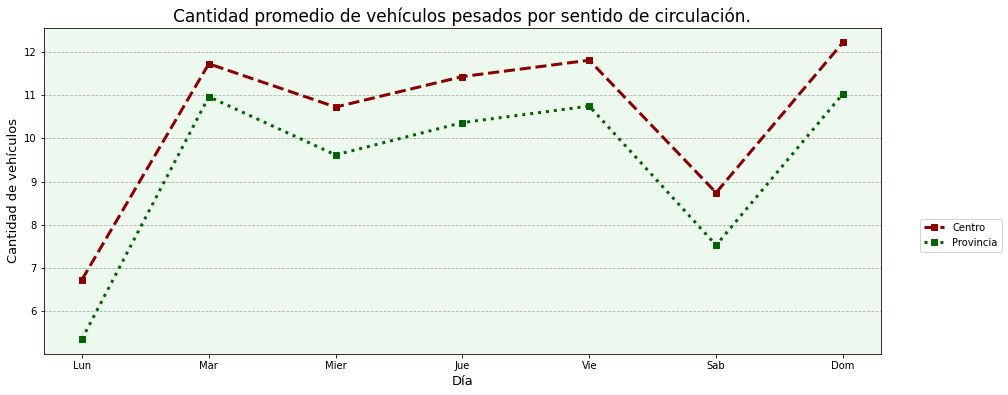

In [35]:
vec_pes = df[df.tipo_vehiculo == 'Pesado']
vec_pes_sentido = vec_pes.groupby(['sentido', 'dia']).cantidad_pasos.mean().reset_index()
vec_pes_sentido_pivot = pivotear_tabla(vec_pes_sentido, 'sentido', 'dia', 'cantidad_pasos')

#fig = plt.figure(figsize = (15, 6))
ax1 = vec_pes_sentido_pivot.plot(style=['--', ':'], linewidth = 3, marker = 's', 
                  color = ['darkred','darkgreen'], figsize = (15,6))

ax1.set_title('Cantidad promedio de vehículos pesados por sentido de circulación.', fontsize = 17)
ax1.set_xlabel('Día', fontsize = 13)
ax1.set_ylabel('Cantidad de vehículos', fontsize = 13)

ax1.set_xticks(range(0,7))
ax1.set_xticklabels(['Lun', 'Mar', 'Mier', 'Jue', 'Vie', 'Sab', 'Dom'])

ax1.legend(bbox_to_anchor=(1.15, 0.43))
ax1.ticklabel_format(axis = 'y', useOffset=False, style='plain')
ax1.set_facecolor('#edf8ee')
ax1.grid(axis = 'y', linestyle='--')

plt.show()

* ***¿Cómo es el comportamiento de la serie de tiempo por mes y año? ¿Existe algún patrón en este comportamiento?***

De la serie de tiempo analizada se puede destacar que:
- Se observa que durante el año 2017 la cantidad de vehículos que circularon por esta autopista fue superior a la cantidad de vehículos de los años siguientes.
- La circulación durante el año 2019 ha sido la menor entre los 3 años analizados. Esto puede deberse a los avances que se iban generando en la obra vial del Paseo del Bajo antes mencionada, la cual influyó en la utilización de esta autopista por parte de los clientes. Se debe destacar que la obra vial del Paseo del Bajo se inició el 2 de enero de 2017, previéndose su terminación el 30 agosto de 2019. Es decir, que se puede concluir que esta obra ha influido en el flujo vehicular de la autopista durante todo el periodo bajo análisis. 
- Se puede observar que los periodos de Enero-Abril y Julio-Agosto presentan un comportamiento similar pese a la diferencia en la cantidad de flujo vehicular registrado. 
- Por último se destaca que los años 2018 y 2019 presentan un patrón de comportamiento similar respecto a la evolución del flujo vehículo mes a mes en comparación con el año 2017.    

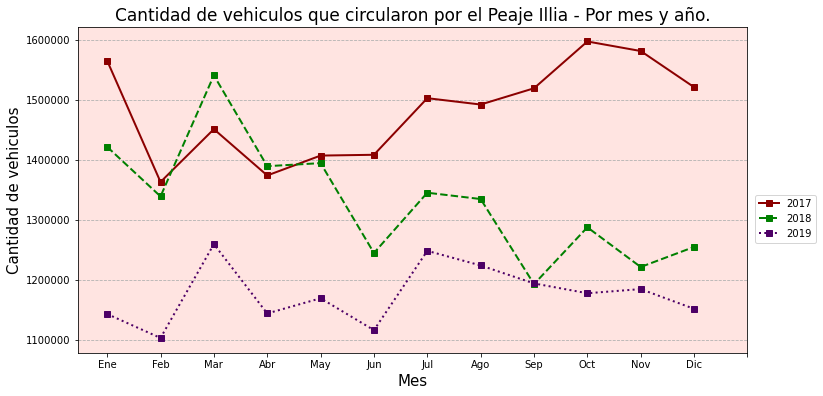

In [36]:
# Cantidad de vehiculos que circularon por mes y año. 
df_año = df.copy()
df_año['año'] = df_año['fecha'].dt.year
df_año['mes'] = df_año['fecha'].dt.month

por_año = df_año.groupby(['mes', 'año']).cantidad_pasos.sum().reset_index()
por_año = por_año.pivot(columns = 'año', index = 'mes', values = 'cantidad_pasos').reset_index(drop=True)

# Gráfico
ax = por_año.plot(style=['-', '--', ':'], linewidth = 2, marker = 's', figsize=(12,6), 
                  color = ['darkred','green', '#4d0066'])
ax.set_xlabel('Mes', fontsize = 15)
ax.set_ylabel('Cantidad de vehiculos', fontsize = 15)
ax.set_title('Cantidad de vehiculos que circularon por el Peaje Illia - Por mes y año.', fontsize = 17)
ax.legend(bbox_to_anchor=(1.11, 0.5))

ax.set_xticks(range(0,13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax.ticklabel_format(axis = 'y', useOffset=False, style='plain')
ax.grid(axis = 'y', linestyle='--')
ax.set_facecolor('mistyrose')
plt.show()

* ***¿Cómo se comporta la serie al agruparala por día y sentido de circulación? ¿Existe algún patrón en este comportamiento?***

Al analizar la serie por días de la semana y sentido vehicular, se observa un patrón similar en ambos sentidos de circulación. Aquí, el flujo vehicular se incrementa durante el transcurso de la semana laboral, mientras decrece hacia el fin de semana. Se observa que el día viernes es el día con mayor circulación. Esto puede estar relacionado con la utilización de esta vía por parte de personas que realizan sus actividades laborales en el Centro de la Ciudad de Bs As o zonas aledañas pero residen en áreas con dirección a Provincia de Bs As.

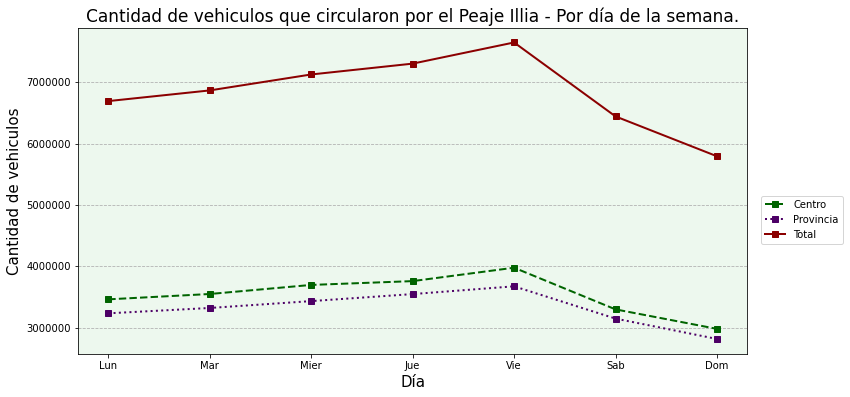

,Centro,Provincia,Total
dia,,,
Lunes,3459619,3231768,6691387
Martes,3546712,3318839,6865551
Miércoles,3694598,3430928,7125526
Jueves,3756857,3545312,7302169
Viernes,3975266,3672006,7647272
Sábado,3295920,3145795,6441715
Domingo,2978394,2813567,5791961


In [37]:
# Cantidad de vehiculos que circularon por día de la semana por sentido vehicular. 
por_dia_sentido = df.groupby(['sentido','dia']).cantidad_pasos.sum().reset_index()
por_dia_sentido = por_dia_sentido.pivot(columns = 'dia', index = 'sentido', values = 'cantidad_pasos').reset_index()
por_dia_sentido = por_dia_sentido[['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']].T
por_dia_sentido.rename(columns = {0:'Centro', 1:'Provincia'}, inplace = True)
por_dia_sentido['Total'] = por_dia_sentido.Centro + por_dia_sentido.Provincia

# Grafico
ax = por_dia_sentido.plot(style=['--', ':','-'], linewidth = 2, marker = 's', figsize=(12,6), 
                          color = ['darkgreen', '#4d0066', 'darkred'])
ax.set_xlabel('Día', fontsize = 15)
ax.set_ylabel('Cantidad de vehiculos', fontsize = 15)
ax.set_title('Cantidad de vehiculos que circularon por el Peaje Illia - Por día de la semana.', fontsize = 17)
ax.legend(bbox_to_anchor=(1.15, 0.5))

ax.set_xticks(range(0,7))
ax.set_xticklabels(['Lun', 'Mar', 'Mier', 'Jue', 'Vie', 'Sab', 'Dom'])
ax.ticklabel_format(axis = 'y', useOffset=False, style='plain')
ax.grid(axis = 'y', linestyle='--')
ax.set_facecolor('#edf8ee')

plt.show()
por_dia_sentido

* ***¿Cómo es el comportamiento de la serie de tiempo si se descompone por sus sentidos de circulación? ¿Alguno de los sentidos de circulación posee una mayor cantidad de vehículos?***

Al analizar el flujo vehicular por sentido de circulación, se decidió realizar un resampleo de forma mensual para que la representación gráfica sea más simple de interpretar. 
Al corroborar el gráfico, se observa que: 
1. La curva de vehiculos que circularon por la autopista en sentido al Centro se ubica por encima de la curva de los vehiculos que se dirigen a Provincia. Esto significa que existe un mayor flujo vehicular con destino a la Capital Federal en todo el periodo temporal del análisis. 
2. Existe una brecha (diferencia vertical) más amplia entre los sentidos de circulación durante el año 2017 que en los periodos restantes. Este comportamiento se presenta nuevamente en los ultimos meses del año 2019. Esto podria deberse a la presencia de un camino alternativo al momento realizar el regreso a Provincia o por la circulación reducida por posibles obras que se hayan llevado a cabo durante esos espacios temporales. 
3. Se observa que la cantidad de vehiculos disminuye año a año hasta estabilizarse parcialmente durante el último tramo de 2019. Nuevamente, puede deberse a las distintas obras que se llevaron a cabo sobre esta autopista durante el periodo de análisis que ha llevado a los usuarios habituales a considerar rutas alternativas. 

In [38]:
# Filtrado del dataset
mask_centro = df.sentido == 'Centro'
mask_prov = df.sentido == 'Provincia'

df_centro = df[mask_centro]
df_prov = df[mask_prov]

print(df_centro.sentido.unique())
print(df_prov.sentido.unique())

['Centro']
['Provincia']


In [39]:
# Resampleo Mensual
df_centro_resamp = df_centro.resample('M', on = 'fecha').sum().reset_index()
df_prov_resamp = df_prov.resample('M', on = 'fecha').sum().reset_index()

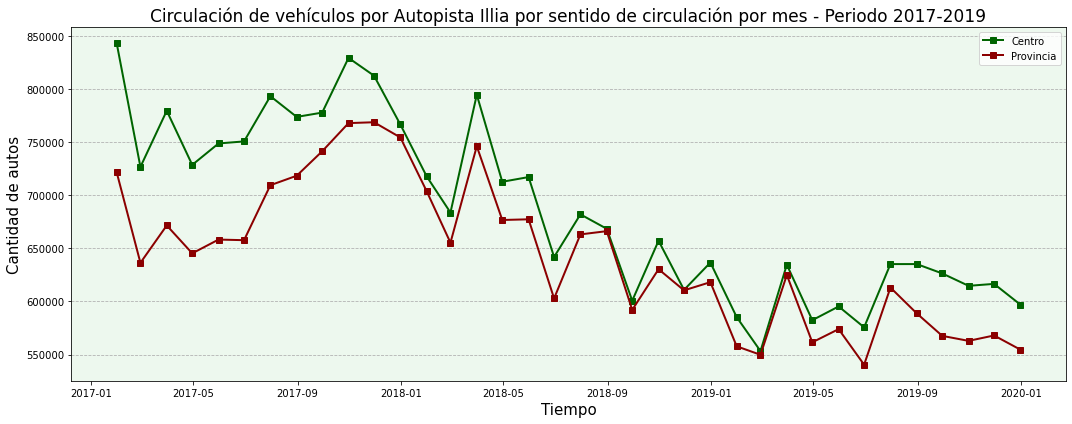

In [40]:
# Gráfico
fig6 = plt.figure(figsize = (15,6))
ax1 = fig6.add_subplot()

ax1.plot(df_centro_resamp.fecha, df_centro_resamp.cantidad_pasos, color='darkgreen', 
         label = 'Centro', linewidth = 2, marker ='s')
ax1.plot(df_prov_resamp.fecha, df_prov_resamp.cantidad_pasos, color='darkred', 
         label = 'Provincia',linewidth = 2, marker ='s')

ax1.set_title('Circulación de vehículos por Autopista Illia por sentido de circulación por mes - Periodo 2017-2019', 
              fontsize = 17)
ax1.set_xlabel('Tiempo', fontsize = 15)
ax1.set_ylabel('Cantidad de autos', fontsize = 15)

ax1.set_facecolor('#edf8ee')
ax1.grid(axis = 'y', linestyle='--')

plt.legend()
plt.tight_layout()
plt.show()

**Preprocesamiento de valores faltantes y nulos**

Ante lo detectado anteriormente respecto a valores atipicos y faltantes, y antes de continuar con el análisis de los componentes de la serie de tiempo, se procederá a convertir los mismos en valores `Nan`y realizar su interpolación. 

A partir de los gráficos obtenidos luego de la transformación realizada, se puede observar que: 

- La serie ya no presenta las caídas repentinas.
- En el histograma se ha reducido sustancialmente su sesgo lateral izquierdo.
- El boxplot sigue presentando algunos valores que pueden considerarse como atípicos, pero en una proporción menor. 

In [41]:
# Se corroboran los valores que son menores al umbral mínimo.
df_sin_atipicos = df_diario.copy()
df_sin_atipicos[df_sin_atipicos.cantidad_pasos < umbral_min]

,fecha,cantidad_pasos
95,2017-04-06,40
540,2018-06-25,0
632,2018-09-25,0
698,2018-11-30,0
699,2018-12-01,350
742,2019-01-13,18076
878,2019-05-29,0


In [42]:
# Se transforman los valores detectados en valores nulos.
df_sin_atipicos.cantidad_pasos[df_sin_atipicos.cantidad_pasos < umbral_min] = np.nan

<ipython-input-42-761fcde1c9a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_atipicos.cantidad_pasos[df_sin_atipicos.cantidad_pasos < umbral_min] = np.nan


In [43]:
# Se procede a interporlar los valores nulos.
print(df_sin_atipicos.isna().sum())
df_preproc = df_sin_atipicos.interpolate()
print(df_preproc.isna().sum())

fecha             0
cantidad_pasos    7
dtype: int64
fecha             0
cantidad_pasos    0
dtype: int64


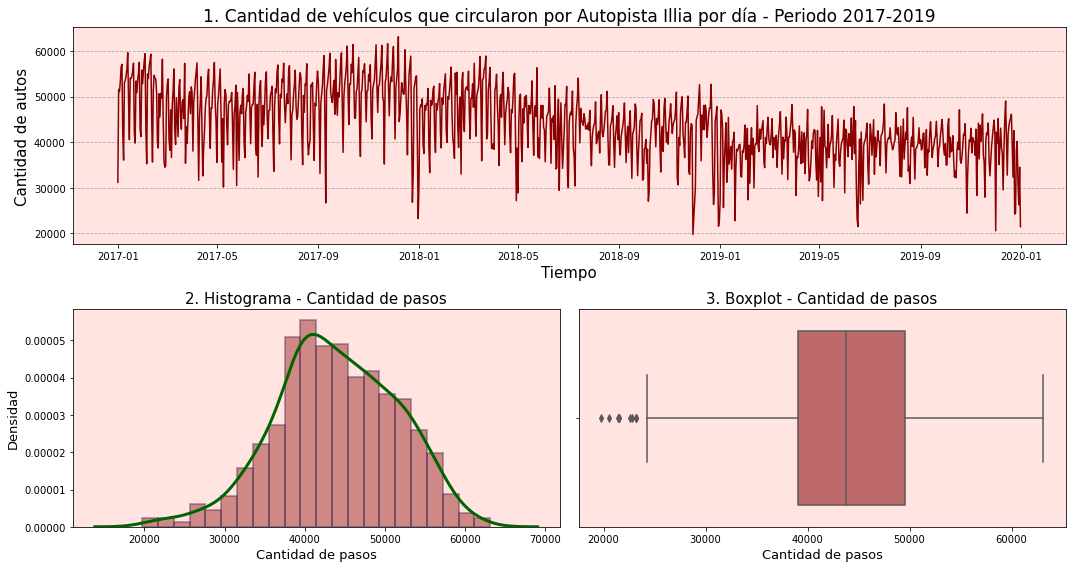

In [44]:
# Gráfico de la serie de tiempo preprocesada.
fig7 = plt.figure(figsize = (15,8))

ax1 = fig7.add_subplot(2,1,1)
ax1.plot(df_preproc.fecha, df_preproc.cantidad_pasos, color='darkred')
ax1.set_title('1. Cantidad de vehículos que circularon por Autopista Illia por día - Periodo 2017-2019', fontsize = 17)
ax1.set_xlabel('Tiempo', fontsize = 15)
ax1.set_ylabel('Cantidad de autos', fontsize = 15)
ax1.set_facecolor('mistyrose')
ax1.grid(axis = 'y', linestyle='--')

ax2 = fig7.add_subplot(2,2,3)
ax2 = sns.distplot (df_preproc.cantidad_pasos, kde_kws = {"color": "darkgreen", "linewidth": 3}, 
                    hist_kws={"color":"darkred", "linewidth": 2, 
                              "edgecolor" : '#453050'})

ax2.set_title('2. Histograma - Cantidad de pasos', fontsize = 15)
ax2.set_xlabel('Cantidad de pasos', fontsize = 13)
ax2.set_ylabel('Densidad', fontsize = 13)
ax2.set_facecolor('mistyrose')
ax2.ticklabel_format(axis = 'y', useOffset=False, style='plain')

ax3 = fig7.add_subplot(2,2,4)
ax3 = sns.boxplot(df_preproc.cantidad_pasos, color = 'indianred')
ax3.set_title('3. Boxplot - Cantidad de pasos', fontsize = 15)
ax3.set_xlabel('Cantidad de pasos', fontsize = 13)
ax3.set_facecolor('mistyrose')

plt.tight_layout()
plt.show()

#### 6. Considerando los distintos componentes y características que conforman una serie de tiempo: 

- **¿La serie de tiempo posee una tendencia definida? ¿Cúales pueden ser las principales razones de esta tendencia?**
- **¿Es una serie de tiempo con estacional (Seasonality)?** 
- **¿La serie de tiempo presenta un proceso estacionario (Stationary)?**
- **¿Cómo se comporta la autocorrelación en esta serie de tiempo?**
    
Como se puede percibir, estas preguntas buscan indagar sobre sobre los principales componentes y características de las series de tiempo. Ante esto, se cree conveniente conceptualizar a los mismos previamente a realizar el análisis pertinente sobre la serie de tiempo en cuestión. 

**A. Componentes de la serie de tiempo:**

Con bastante frecuencia, las series temporales presentan una o varias características, denominadas componentes, que ayudan a explicar su comportamiento en el tiempo. De manera amplia, es posible definir a sus componentes de la siguiente manera:

- *Componente Tendencial o Tendencia:*

Se denomina tendencia de una serie temporal a su comportamiento o movimiento a largo plazo

- *Componente cíclica:*

Esta componente refleja comportamientos recurrentes (aunque no tienen por qué ser exactamente periódicos), con un periodo superior a un año. Muestran, habitualmente, cómo se suceden las etapas de bonanza económica con las de crisis, o al menos, desaceleración.

- *Componente estacional:*

Muchas series presentan oscilaciones regulares en el mismo mes de cada año, y con unas pautas que se presentan, sin repetirse exactamente, todos los años. Son las llamadas "variaciones estacionales", y se deben básicamente a causas climatológicas, vacacionales o fiscales, entre otras. 
La estacionalidad no se presenta sólo cuando el periodo amplio es el año. A veces pueden existir estacionalidades mensuales o semanales en series diarias, o estacionalidades diarias en series horarias. Es importante que las estacionalidades tengan un periodo no superior al año, para que no se confundan con las componentes cíclicas. 

- *Componente irregular:*

También llamado "ruido", recoge alteraciones de la serie, pequeñas en su incidencia, y sin una pauta periódica ni tendencial reconocible. Se considera que está ocasionada por múltiples factores, de pequeña entidad y diferentes ritmos temporales, que no se pueden estudiar individualmente. La componente irregular recogería, en consecuencia, la incapacidad del modelo para explicar a la perfección el comportamiento de la serie temporal.


Para poder descomponer estos elementos en la presente serie de tiempo se aplicarán las siguientes herramientas:

- **Media Móvil**: Este método consiste en tomar una ventana de tiempo suficientemente grande y promediar la serie sobre esa ventana. Es conocido por ser una de las formas más sencillas para conocer la tendencia. Una característica de este método es que no asume ninguna forma para la serie de tiempo por lo que suele funcionar mejor que, por ejemplo, una regresión lineal.


- **seasonal_decompose:** Esta función, proporcionado por la librería  `statsmodels` permite obtener los distintos componentes de la serie de tiempo en forma individual para su posterior análisis. 


**B. Proceso estacionario en una serie de tiempo (Stationary):**

En matemáticas y estadística, un proceso estacionario es un proceso estocástico cuya distribución de probabilidad conjunta incondicional no cambia cuando se cambia en el tiempo. Es decir, que una serie de tiempo será estacionaria si sus propiedades estadísticas, como la media y la varianza, permanecen constantes a lo largo del tiempo. 

Dado que la estacionariedad es un supuesto subyacente a muchos procedimientos estadísticos utilizados en el análisis de series de tiempo, los datos no estacionarios a menudo se transforman para volverse estacionarios. De esta manera, una serie de tiempo se puede transformar fácilmente en un proceso estacionario eliminando la tendencia subyacente, que es únicamente una función del tiempo. 

Para que una serie de tiempo se clasifique como estacionaria (considerando la estacionariedad de covarianza), se deben satisfacer tres condiciones:

1.	Media constante
2.	Varianza constante
3.	Covarianza constante entre períodos de idéntica distancia, es decir, que la covarianza entre períodos de tiempo de idéntica duración (10 días / horas / minutos) debe ser idéntica a la covarianza de algún otro período de la misma duración

Para corroborar si esta serie de tiempo es, o no, estacionaria se implementará la prueba desarrollada por David Dickey y Wayne Fuller conocida como **Prueba Augmented Dicky Fuller* o *Prueba ADF**.

Esta prueba consiste en realizar prueba de hipótesis, donde:

*	La *Hipótesis Nula* o *H0* establece que la serie temporal no es estacionaria.
*	Mientras que, la *Hipótesis Alternativa* o *H1* indica que la serie temporal es estacionaria.

La Prueba ADF permite calcular fácilmente el estadístico de prueba y compararlo con valores críticos. Si el estadístico de prueba es menor que el valor crítico, podemos rechazar la hipótesis nula y declarar la serie de tiempo como *estacionaria*.

**C. Autocorrelación:**

Una parte fundamental en el estudio de series de tiempo, bajo la modelación clásica gira en torno a la relación que pueda existir entre los valores de una serie de tiempo. A esta relación o correlación entre los valores de una misma variable se le llama autocorrelación. 

La autocorrelación se define como la relación mutua existente entre valores de una serie de tiempo en diferentes periodos y describe lo que tiende a sucederle a un valor si se da un cambio en el otro. Sirve para medir si los valores previos contienen mucha información acerca del próximo valor, indicando si el proceso es cíclico o puramente aleatorio sin dependencias.


A continuación, se procede a analizar los componentes de la serie de tiempo con las herramientas antes mencionadas:

***A. Componentes de la serie de tiempo*** 

**Media Movil:**

Se procederá a calcular y gráficar la curva de medida móvil trimestral. 

In [45]:
df_preproc = df_preproc.set_index(df_preproc.fecha)
df_preproc = df_preproc.drop(['fecha'], axis = 1)
df_preproc.head()

,cantidad_pasos
fecha,
2017-01-01,31183.00
2017-01-02,51568.00
2017-01-03,51093.00
2017-01-04,53332.00
2017-01-05,56486.00


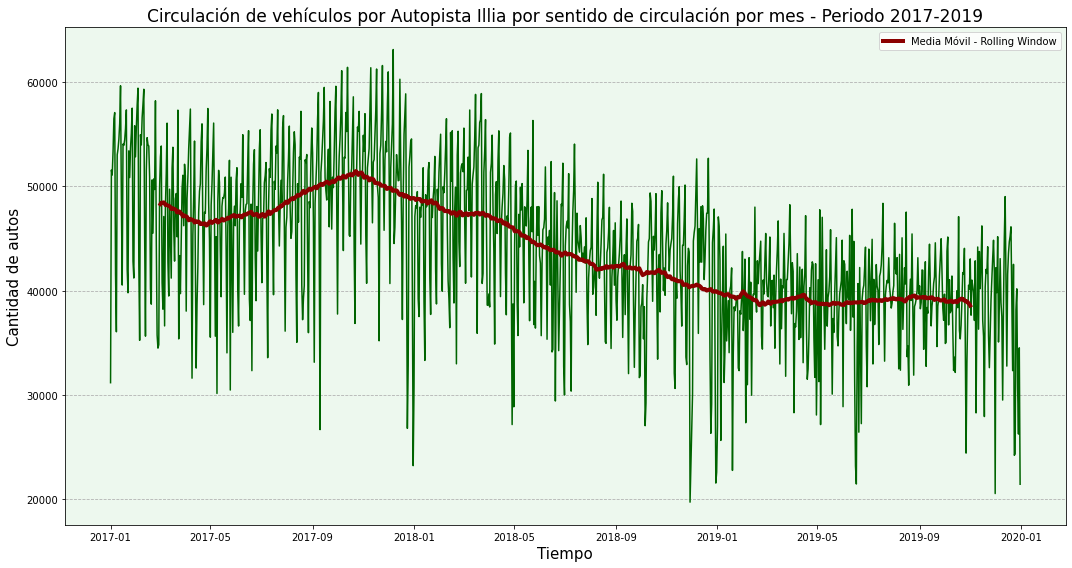

In [46]:
# Definir ventana 
ventana = int(365/3) # Trimestres.
media_movil = df_preproc.cantidad_pasos.rolling(window=ventana, center = True).mean()

# Gráfico
fig8 = plt.figure(figsize = (15,8))
ax1 = fig8.add_subplot()

ax1.plot(df_preproc.index, df_preproc.cantidad_pasos, color='darkgreen')
ax1.plot(media_movil, color='darkred', lw = 4, label = 'Media Móvil - Rolling Window')

ax1.set_title('Circulación de vehículos por Autopista Illia por sentido de circulación por mes - Periodo 2017-2019', 
              fontsize = 17)
ax1.set_xlabel('Tiempo', fontsize = 15)
ax1.set_ylabel('Cantidad de autos', fontsize = 15)

ax1.set_facecolor('#edf8ee')
ax1.grid(axis = 'y', linestyle='--')

plt.legend()
plt.tight_layout()
plt.show()

In [47]:
media_movil[media_movil == media_movil.max()]

fecha
2017-10-23   51474.68
Name: cantidad_pasos, dtype: float64

Al analizar la forma de la curva de media móvil, se observa que la misma alcanza un máximo el 23 de Octubre de 2017 y, a partir de esa fehca, su pendiente sigue un camino decreciente. Las razones que puede llevar a este comportamiento pueden consistir en:

- Una disminución en la cantidad de vehículos que circulan por la autopista Illia debido a las obras de remodelación que se llevan a cabo sobre la misma. 
- Una disminución en la cantidad de clientes que abonan el servicio con efectivo. 
- Otras variables de caracter socio-económico-ambientales que hayan llevado a la disminución de los vehiculos en esta autopista, por ejemplo la caída del poder adquisitivo del salario, la implementación de teletrabajo, la realización de pool de viajes entre compañeros de trabajo, etc. 

A continuación, se procede a aplicar la función `seasonal_descompose` para analizar graficamente los demas componentes de la serie de tiempo. 

In [48]:
descomp_serie = seasonal_decompose(df_preproc['cantidad_pasos'], model='additive')

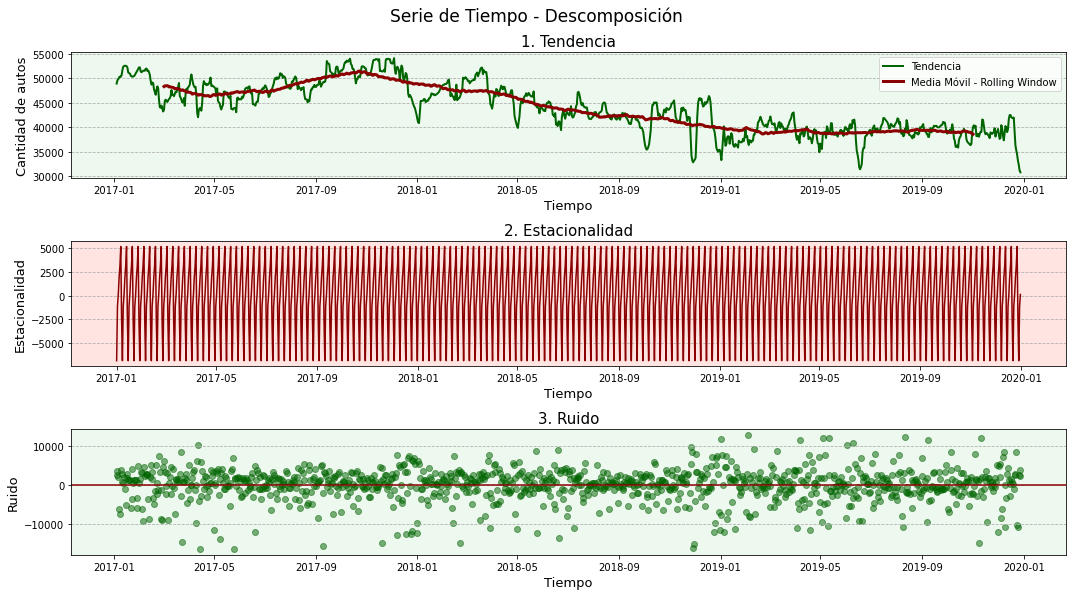

In [49]:
fig9 = plt.figure(figsize = (15,8))

# Tendencia
ax1 = fig9.add_subplot(3,1,1)
ax1.plot(descomp_serie.trend.index, descomp_serie.trend, color='darkgreen', lw = 2, label = 'Tendencia')
ax1.plot(media_movil, color='darkred', lw = 3, label = 'Media Móvil - Rolling Window')
ax1.set_title('1. Tendencia', fontsize = 15)
ax1.set_xlabel('Tiempo', fontsize = 13)
ax1.set_ylabel('Cantidad de autos', fontsize = 13)
ax1.set_facecolor('#edf8ee')
ax1.grid(axis = 'y', linestyle='--')
ax1.legend()

# Estacionalidad
ax2 = fig9.add_subplot(3,1,2)
ax2.plot(descomp_serie.seasonal.index, descomp_serie.seasonal, color='darkred')
ax2.set_title('2. Estacionalidad', fontsize = 15)
ax2.set_xlabel('Tiempo', fontsize = 13)
ax2.set_ylabel('Estacionalidad', fontsize = 13)
ax2.set_facecolor('mistyrose')
ax2.grid(axis = 'y', linestyle='--')

# Ruido
ax3 = fig9.add_subplot(3,1,3)
ax3.scatter(descomp_serie.resid.index, descomp_serie.resid, color='darkgreen', alpha =0.5)
ax3.axhline(y = 0, color='darkred')
ax3.set_title('3. Ruido', fontsize = 15)
ax3.set_xlabel('Tiempo', fontsize = 13)
ax3.set_ylabel('Ruido', fontsize = 13)
ax3.set_facecolor('#edf8ee')
ax3.grid(axis = 'y', linestyle='--')

plt.suptitle('Serie de Tiempo - Descomposición',y = 1.03, fontsize=17)
plt.tight_layout()
plt.show()

A partir de estos gráficos es posible observar que: 
- La serie temporal muestra una clara tendencia bajista la cual se asemeja a la media móvil calculada. 
- No es posible observar si la misma es estacional o no. Sin embargo, por lo analizado en apartados anteriores, es posible observar ciertos patrones que se repiten en forma mensual (año a año) y otros de forma semanal (como la diminución en la cantidad de vehículos que circulan los fines de semana). 
- Por otro lado, los residuales parecen encontrarse mas dispersos en los valores negativos que en los valores positivos, salvo en el ultimo año (2019) donde la distribución parece tomar un comportamiento más aleatorio. Al analizar el siguiente histograma, se observa que los mismos tienden a distribuirse de forma similar a la distribución normal, con una cierta concentración en torno a +/-5000 y con largas colas en ambos sentidos. Estos valores de aparente distribución aleatoria representan a aquellos elementos que el modelo es incapaz de explicar. 

In [50]:
descomp_serie.resid.isnull().sum()

6

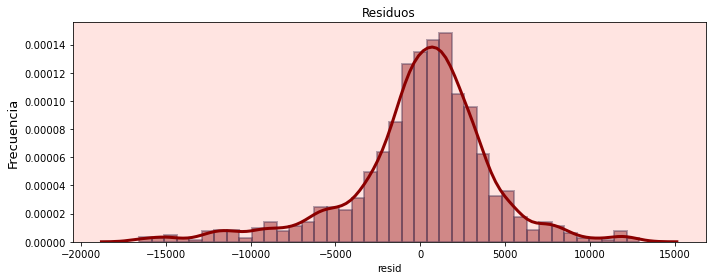

In [51]:
# Histogramas de los residuos de la serie de tiempo.

fig10 = plt.figure(figsize = (10,4))
ax1 = fig10.add_subplot()
ax1 = sns.distplot (descomp_serie.resid, kde_kws = {"color": "darkred", "linewidth": 3}, 
                    hist_kws={"color":"darkred", "linewidth": 2, 
                              "edgecolor" : '#453050'})
ax1.set_title('Residuos')
ax1.set_ylabel('Frecuencia', fontsize = 13)
ax1.set_facecolor('mistyrose')
plt.tight_layout()
plt.show()

***B. Prueba de Estacionareidad:***

La Prueba ADF de la biblioteca de python Statsmodels devuelve los siguientes resultados:
- Estadístico de la prueba.
- Valor P.
- Número de retrasos utilizados,
- Número de observaciones utilizadas.
- Valores criticos. 
- Estimación de los criterios de información maximizados (básicamente cuanto más bajo es más fácil es hacer pronósticos futuros)

Para saber si la serie es, o no, estacional se debe comparar el p valor con un *umbral de significacia*. 

Como regla general se suele contemplar un umbral de significacia del 5% (o 0.05). De esta manera, si el valor p es menor que 0.05, el valor p es significativo, en consecuencia se rechazará la hipótesis nula y se concluira que la serie de tiempo es estacionaria.

In [50]:
estadistico, p_valor, retrasos, n_observaciones, valores_criticos, criterios = adfuller(df_preproc['cantidad_pasos'])

In [51]:
if p_valor < 0.05: 
    print('El p valor asciende a {p} siendo menor que el umbral de significancia del 5%.'.format(p = round(p_valor, 4)))
    print('Se rechaza la hipótesis nula. Por lo tanto: ')
    print('Con un nivel de confianza del 95%, se puede concluir que la serie de tiempo bajo análisis es estacional')
else:
    print('El p valor asciende a {p} siendo mayor que el umbral de significancia del 5%.'.format(p = round(p_valor, 4)))
    print('Se rechaza la hipótesis alternativa. Por lo tanto: ')
    print('Con un nivel de confianza del 95%, se puede concluir que la serie de tiempo bajo análisis NO es estacionaria')

El p valor asciende a 0.4155 siendo mayor que el umbral de significancia del 5%.
Se rechaza la hipótesis alternativa. Por lo tanto: 
Con un nivel de confianza del 95%, se puede concluir que la serie de tiempo bajo análisis NO es estacionaria


En este caso, si se procedería a utilizar un modelo clásico, como ARIMA, ARMA o similar, sería necesario realizar una transformación en la serie de tiempo de forma tal que la misma sea estacionaria.


**C. Autocorrelación**

A partir del concepto desarrollado anteriormente, se procede a ejecutar el siguiente código el cúal crea una representación de la función ACF. Este gráfico muestra la correlación entre los valores de la serie de tiempo (en el eje *y*) y el valor de retraso (*lag*) (a lo largo del eje *x*). La correlación es un valor que asume valores entre entre -1 y 1. Estos coeficientes además de detectar la existencia de una relación entre los valores de la serie de tiempo, miden el tipo y grado de esta. Así:

- Decimos que los valores de la serie de tiempo están positivamente correlacionadas cuando ambos crecen y decrecen a la vez. En estos casos, la autocorrelación asumirá valores cercanos a 1.
- Si uno de los valores decrece y el otro crece, y viceversa, entonces se puede concluir que los valores de la serie de tiempo estarán negativamente correlacionadas. En este caso, el valor de la autocorrelación tendrá un valor cercano a -1.
- Por último, si no parece haber una relación entre su comportamiento, los valores de la serie de tiempo no estrán correlacionadas y, por lo tanto, la autocorrelación asumira un valor cercano a 0.

La autocorrelación simple mide la relacion lineal entre las observaciones de la serie de tiempo *Yn* distanciados en un lapso de tiempo *k o nlags*. A este lapso de tiempo se le conoce como retardo o retraso. Este retardo denota el periodo de timepo entre los valores de la serie, para el cual se mide el tipo y grado de correlación de la variable considerada. 

Algunos autores, como Box y Jenkins, sugieren que el número maximo de autocorrelaciones calculadas sea de *N/4*, donde *N* es el número total de observaciones. 

A partir de este gráfico se puede observar la autocorrelación: 
- Más fuerte es con el valor más reciente
- Disminuye a medida que se incrementa el tiempo del retardo.
- En su mayoría es positiva, variando entre 0 y 0.6, lo que indica que los valores tienden a moverse en forma similar. Sin embargo, a medida que transcurre el tiempo, empieza a influir otros factores que hacen que los valores no esten tan autocorrelacionados. 

In [1]:
# Función de autocorrelación con un retardo de 365 días.
nlags =  round(len(df_preproc.cantidad_pasos) / 4)

autocorr = acf(df_preproc.cantidad_pasos, nlags = nlags)

fig11 = plt.figure(figsize = (12,4))
ax = fig11.add_subplot()
ax.scatter(np.arange(nlags+1), autocorr, color = 'darkgreen')
ax.set_xlabel('Lag o Retardo', fontsize = 14)
ax.set_ylabel('Autocorrelación', fontsize = 14)
ax.set_title('Función ACF - Correlación Simple', fontsize = 16)
ax.set_facecolor('#edf8ee')
ax.grid(axis = 'y', linestyle='--')
plt.show()

NameError: name 'df_preproc' is not defined

### PARTE C: Modelo de Machine Learning - Predicción a Futuro

#### Modelo de Machine Learning seleccionado:

Con el objetivo de predecir la circulación de vehículos en el último trimestre de 2019, se procederá a entrenar un modelo de `RandomForestRegressor` utilizando la estrategia One-Step Prediction. Es decir, que esta estrategia buscará obtener la predicción de la observación en el siguiente paso de tiempo (en este caso, en el día siguiente).

#### Modelo de Benchmark:

Con el objetivo de poder evaluar los resultados obtenidos con los modelos entrenados (y elegir el mejor para su optimización), se procederá a comparar los resultados obtenidos con un modelo el cual basará su predicción para el día N considerando la cantidad de vehículos que han circulado por la autopista Illia en igual día de la semana anterior. Así, por ejemplo, el valor predicho para el 30 de diciembre de 2019 corresponderá a la cantidad de vehículos que circularon por la autopista el día 23 de Diciembre del mismo año, siendo lunes ambos días.

#### Métrica de evaluación del modelo: 
La métrica de evaluación de los modelos que se utilizará será la *Raíz del Error Cuadrático Medio (RSME)*. El error cuadrático medio (RMSE) mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido.

### Modelos de Machine Learning:
#### 1°. Establer el Lookback:

Al predecir una serie de tiempo, normalmente usamos valores anteriores de la serie para predecir un valor futuro. De esta manera, se conoce como lookback a la cantidad de valores de la serie de tiempo que se considerarán para predecir cada uno de los valores futuros.  
Debido a que usamos estos valores anteriores, es útil trazar nuevamente la función de autocorrelación considerando un intervalo del 95% con el fin de poder determinar cuantos valores hacia atrás se deberían considerar en el entrenamiento del modelo. 

A partir de este grafico es posible observar que la autocorrelación cae dentro del intervalo de confianza en un valor cercano a 225 días, por lo cual se considerará a este valor como lookback del modelo de pronóstico. 

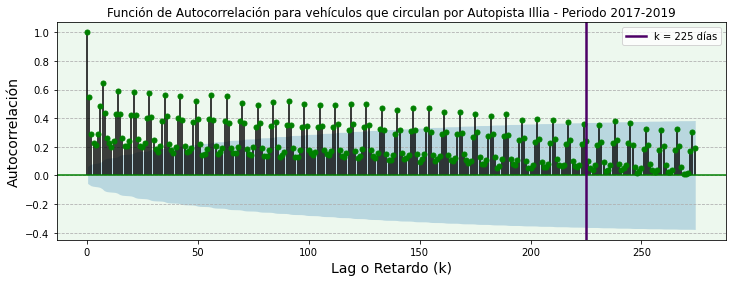

In [53]:
fig12 = plt.figure(figsize = (12,4))
ax = fig12.add_subplot()
plot_acf(df_preproc.cantidad_pasos, lags = nlags, ax = ax, color = 'green')
ax.axvline(x = 225, c = '#4d0066', lw = 2.5, label = 'k = 225 días')
ax.set_facecolor('#edf8ee')
ax.grid(axis = 'y', linestyle='--')
ax.set_title('Función de Autocorrelación para vehículos que circulan por Autopista Illia - Periodo 2017-2019')
ax.set_xlabel('Lag o Retardo (k)', fontsize = 14)
ax.set_ylabel('Autocorrelación', fontsize = 14)
plt.legend()
plt.show()

#### 2°. Separar dataset en conjunto de entrenamiento y de evaluación:
Definido el valor de lookback, se crearan los conjuntos *X* e *y* con ceros para luego ser rellenados con los datos correspondientes:

In [54]:
senial = df_preproc.cantidad_pasos

look_back = 225

N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

print(N)
print(X.shape, y.shape)

1095
(869, 225) (869,)


In [55]:
# Se rellena X e y. 
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [56]:
X[0:1]

array([[31183., 51568., 51093., 53332., 56486., 57081., 41587., 36065.,
        53036., 53601., 54523., 56042., 59651., 49014., 40546., 54061.,
        53940., 54468., 55548., 57337., 42057., 39804., 53409., 50855.,
        53657., 55105., 57506., 42831., 41218., 55814., 52842., 55616.,
        57795., 59423., 42667., 35244., 54963., 53979., 56618., 57882.,
        59319., 45366., 35647., 51546., 54678., 54004., 53871., 50876.,
        40188., 38714., 50629., 45525., 50722., 49708., 58213., 44850.,
        35748., 34497., 34825., 49891., 52832., 53876., 40755., 38232.,
        47117., 36627., 48173., 51247., 56069., 42768., 39493., 49738.,
        45608., 41210., 51752., 53757., 45887., 42842., 48803., 49320.,
        45169., 57317., 35383., 43370., 39721., 45029., 49792., 51074.,
        46235., 52127., 50995., 38045., 48833., 50891., 53655., 55537.,
        57419., 44409., 31615., 45346., 49017., 54351., 42650., 32588.,
        38688., 42272., 47573., 49557., 50244., 54288., 56002., 

In [57]:
y[0:1]

array([50265.])

Se realiza la separación de los conjuntos de entrenamiento y prueba. 

Dado que se desea calcular la cantidad de vehículos que circualrían en el último trimestre del año 2019, se considerará como conjunto de prueba un total de 91 días (Lo que representa un 8% del dataset) correspondiente a los días que transcurren desde el 1 de octubre al 31 de diciembre. 

In [58]:
N_train = 1003 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 91 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train : N_train + N_test, :]
y_test = y[N_train : N_train + N_test]
print(X_test.shape, y_test.shape)

(778, 225) (778,)
(91, 225) (91,)


#### 3°. Entrenar modelo de benchmark:
Se procede a entrenar un modelo simple basado en predecir el valor siguiente en la serie de tiempo a partir del último valor obtenido

In [59]:
# Predicciones
y_test_pred_benchmark = y[-7 + N_train:N_train + N_test - 7]

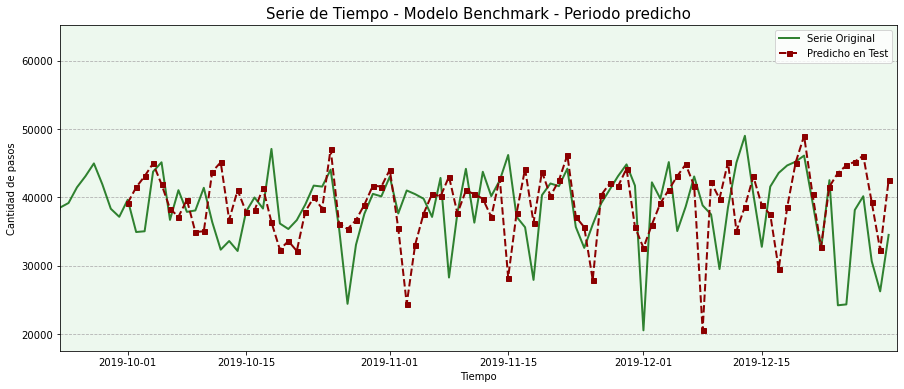

In [60]:
# Grafico de la serie de tiempo predicha. 
fig13 = plt.figure(figsize=(15,6))
ax = fig13.add_subplot()
ax.plot(senial.index[:length_total], senial[:length_total],lw = 2, alpha = 0.8, 
        color = 'darkgreen', label = 'Serie Original')
ax.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'--', lw = 2, marker ='s', ms = 5, 
         color = 'darkred', label = 'Predicho en Test')
ax.set_xlim(senial.index[N_train+look_back-8], senial.index[length_total])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Cantidad de pasos')
ax.set_title('Serie de Tiempo - Modelo Benchmark - Periodo predicho', fontsize = 15)
ax.legend()

ax.set_facecolor('#edf8ee')
ax.grid(axis = 'y', linestyle='--')
plt.show()

In [61]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
RMSE = round(np.sqrt(MSE),2)
print('Error en Test:',RMSE )

Error en Test: 6846.95


#### 4° Entrenar el modelo a partir de la estrategia One-Step Prediction seleccionada. 

In [62]:
# Entrenamiento del modelo.
rf = RandomForestRegressor(random_state=42, n_jobs = -1, criterion = 'mse',
                              max_depth = None).fit(X_train,y_train)

In [63]:
# Predicciones.
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

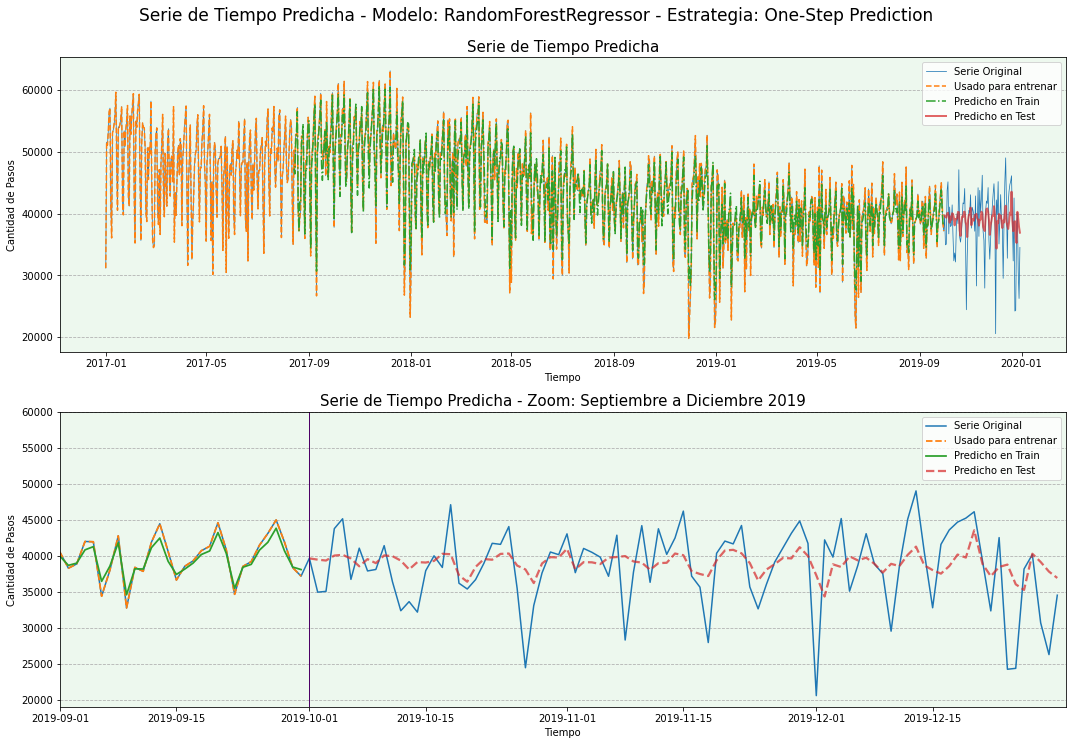

In [64]:
# Grafico de serie de tiempo predicha.
fig13 = plt.figure(figsize=(15,10))

# Serie de Tiempo Predicha
ax1 = fig13.add_subplot(2,1,1)
ax1.plot(senial.index[:length_total], senial[:length_total], lw = 0.75, label = 'Serie Original')
ax1.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
ax1.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
ax1.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-', lw = 2, 
         alpha = 0.7, label = 'Predicho en Test')

ax1.set_title('Serie de Tiempo Predicha', fontsize = 15)
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Cantidad de Pasos')
ax1.legend()
ax1.grid(axis = 'y', linestyle='--')
ax1.set_facecolor('#edf8ee')

# Zoom en los ultimos 6 meses de 2019
ax2 = fig13.add_subplot(2,1,2)
ax2.plot(senial.index[:length_total], senial[:length_total], lw = 1.5, label = 'Serie Original')
ax2.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 1.75, label = 'Usado para entrenar')
ax2.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-', lw = 1.75, label = 'Predicho en Train')
ax2.plot(senial.index[N_train+look_back: length_total], y_test_pred,'--', lw = 2.25, 
         alpha = 0.7, label = 'Predicho en Test')
ax2.axvline(x = datetime.datetime(2019, 10, 1), c = '#4d0066', lw = 1)
ax2.set_title('Serie de Tiempo Predicha - Zoom: Septiembre a Diciembre 2019', fontsize = 15)
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Cantidad de Pasos')
ax2.legend()
ax2.set_ylim([19000,60000])
ax2.set_xlim([datetime.datetime(2019, 9, 1), datetime.datetime(2019, 12, 31)])
ax2.set_facecolor('#edf8ee')
ax2.grid(axis = 'y', linestyle='--')

plt.suptitle('Serie de Tiempo Predicha - Modelo: RandomForestRegressor - Estrategia: One-Step Prediction',
             y = 1.03, fontsize=17)
plt.tight_layout()
plt.show()

In [65]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1780.7591405745147
Error en Test: 5006.0448201247455


Como se puede observar a partir de los RSME obtenidos, el modelo se ajusta relativamente bien a los datos de entrenamiento, pero no logra concretar un buen ajuste para los datos nunca vistos. En este caso, el modelo entrenado estaría presentando un bajo sesgo (Bias) y una alta varianza, generando un rendimiento muy bajo y, permitiendo concluir que el mismo se encuentra **sobreajustado**.

Esto se puede apreciar perfectamente en las gráficas realizadas. En ellas,el modelo replica el comportamiento de la serie en forma bastante precisa para el conjunto de entrenamiento (color verde) pero no logra continuar con esta precisión en los datos nunca antes vistos (color rojo).

Se procederá a aplicar **validación cruzada** para evaluar los resultados obtenidos y garantizar que son independientes de la partición entre datos de entrenamiento y prueba. Sin embargo, al trabajar con series de tiempo la validación cruzada como K-fold  no proporciona un resultado robusto debido a la naturaleza de los datos. 

En series de tiempo, el supuesto estadístico conocido como *IID* o *Identically Distributed Independence* (o en español, supuesto de independencia distribuida de forma idéntica) no se ajusta del todo bien. Esto se debe a que los modelos de predicción en series de tiempo se basan en que el futuro va a comportarse como el pasado. Mientras que el supuesto IDD indica que normalmente en estadísticas se suele trabajar con muestras aleatorias donde no hay tendencias generales y los elementos de la muestra son todos eventos independientes. 

Ante esto, existen dos técnicas que se adaptan cuidadosamente para resolver los problemas encontrados en el pronóstico de series de tiempo:

- **Time series split cross-validation:** Esta técnica consiste en dividir el conjunto de entrenamiento en dos pliegues para cada iteración con la condición de que el conjunto de validación esté siempre por delante de la división de entrenamiento. En la primera iteración, uno entrena el modelo sobre los datos de un periodo de tiempo que va, por ejemplo, de enero a marzo y valida con los datos de abril. Para la siguiente iteración, entrena los datos de enero a abril y valida con los datos de mayo, y así sucesivamente hasta el final del conjunto de entrenamiento. De esta forma se respeta la dependencia. El problema que presenta esta técnica es que puede introducir fugas de datos futuros al modelo. El modelo puede observar patrones futuros para pronosticar e intentará memorizarlos. 


- **Blocked cross-validation:** Funciona agregando márgenes en dos posiciones. La primera es entre los pliegues de entrenamiento y validación para evitar que el modelo observe valores de retardo que se utilizan dos veces, una como regresor y otra como respuesta. La segunda posición está entre los pliegues utilizados en cada iteración para evitar que el modelo memorice patrones de una iteración a la siguiente.

En este caso, se procederá a utilizar **Blocked cross-validation** por considerarlo más robusto. Para ello, Sci-kit Learn ofrece la posibilidad de definir nuevos tipos de divisores siempre que cumplan con su API de divisores y herede el divisor base.

In [66]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.5 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [67]:
btscv = BlockingTimeSeriesSplit(n_splits = 5)
rmse = np.sqrt(-cross_val_score(rf, X_train, y_train, cv=btscv, scoring = 'neg_mean_squared_error'))

print(f"RMSE: {rmse.mean()} (+/- {rmse.std()})")

RMSE: 4869.7396999622415 (+/- 1056.6529999264858)


Como resultado de aplicar esta técnica de validación cruzada sobre el modelo entrenado se puede confirmar que el mismo se encuentra sobreajustado a los datos de entrenamiento. 

Ante esto, se procederá a intentar mejorar el modelo entrenado bajo la estrategia one-step prediction a través de la optimización de sus hiperparametros. 


#### 5°. Optimización de hiperparámetros del modelo
Con el objetivo de intentar obtener un modelo que no se sobreajuste a los datos de entrenamiento y, a su vez, genere un resultado consistente, se procederá a realizar la optimización de los hiperparametros para el anterior modelo desarrollado. 

Para ello, se procederá a utilizar distintos valores para el hiperparámetro lookback y `GridSearchCV` con `BlockingTimeSeriesSplit`. 

In [68]:
def one_step_optimization(senial, lookback, dias_entrenamiento, dias_prueba, param_grid):
    
    """Función que permite optimizar los hiperparametros para un modelo RandomForest aplicado
    a Series de Tiempo utilizando la estrategia One-Step Prediction, utilizando como métrica 
    de evaluación la Raiz del error cuadrático medio."""
    
    # Lookback
    look_back = lookback

    N = senial.shape[0]
    X = np.zeros((N - look_back - 1, look_back))
    y = np.zeros(N - look_back - 1)

    # Se rellena X e y. 
    for i in range(X.shape[0]):
        X[i,:] = senial.iloc[i:i+look_back]
        y[i] = senial.iloc[i+look_back]

    # Separación del conjunto en entrenamiento y prueba.
    N_train = dias_entrenamiento - look_back # cantidad de instancias que vamos a usar para entrenar. 
    N_test = dias_prueba #cantidad de puntos que vamos a usar para evaluar
    N_total = N_train + N_test

    length_total = N_train + N_test + look_back

    X_train = X[:N_train,:]
    y_train = y[:N_train]

    X_test = X[N_train : N_train + N_test, :]
    y_test = y[N_train : N_train + N_test]
    
    # Entrenamiento del Modelo: 
    rf = RandomForestRegressor(random_state = 42, n_jobs = -1).fit(X_train,y_train)
    
    # Optimización de Hiperparametros:
    grid_model = GridSearchCV(
        estimator = rf,
        param_grid = param_grid,
        scoring = 'neg_root_mean_squared_error',
        n_jobs = -1,
        iid = False,
        refit = True,
        cv = btscv,
        verbose = 1,
        pre_dispatch = 8,
        error_score = -999,
        return_train_score = True)

    grid_model.fit(X_train, y_train)

    
    matriz_metricas = pd.DataFrame(columns = ['Lookback', 
                                              'criterion', 
                                              'max_depth', 
                                              'max_samples',
                                              'min_samples_leaf', 
                                              'Mejor RMSE'])
    matriz_metricas.loc[0] = [lookback, 
                              grid_model.best_params_['criterion'],
                              grid_model.best_params_['max_depth'],
                              grid_model.best_params_['max_samples'],
                              grid_model.best_params_['min_samples_leaf'],
                              round(-grid_model.best_score_,2)] 
    
    return matriz_metricas

    print('LOOKBACK: ' + str(lookback))
    print("Mejores parametros: " + str(grid_model.best_params_))
    print("Mejor RSME: " + str(round(-grid_model.best_score_),2)+'\n')
    print('-' * 120)

In [69]:
lookbacks = [30, 90, 120, 150, 180, 210, 225]
dias_entrenamiento =  1003
dias_prueba = 91
param_grid = {
    'criterion' : ['mse','mae'],
    'max_depth' : [50, 100, 200, None],
    'min_samples_leaf' : [10, 50, 100],
    'max_samples' : [0.25, 0.5, 0.75]}

In [70]:
# Tabla de Resultados obtenido en la optimización de hiperparámetros. 
tabla_de_metricas = pd.DataFrame(columns = ['Lookback', 
                                              'criterion', 
                                              'max_depth', 
                                              'max_samples',
                                              'min_samples_leaf', 
                                              'Mejor RMSE'])

for lookback in lookbacks: 
    tabla = one_step_optimization(senial, lookback, dias_entrenamiento, dias_prueba, param_grid)
    tabla_de_metricas = tabla_de_metricas.merge(tabla, how = 'outer')

# Ordenar por resultado obtenido
tabla_de_metricas = tabla_de_metricas.sort_values(by = ['Mejor RMSE']).reset_index(drop = True)
tabla_de_metricas

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   27.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   30.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   30.3s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   30.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   30.3s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   30.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   30.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


,Lookback,criterion,max_depth,max_samples,min_samples_leaf,Mejor RMSE
0,180.00,mse,50.00,0.75,10.00,4220.21
1,120.00,mse,50.00,0.75,10.00,4350.85
2,150.00,mse,200.00,0.75,10.00,4381.60
3,210.00,mse,200.00,0.75,10.00,4696.22
4,225.00,mse,100.00,0.75,10.00,4814.39
5,90.00,mse,50.00,0.75,10.00,4863.69
6,30.00,mse,50.00,0.75,10.00,4937.26


Se procederá a graficar la serie predicha para el mejor resultado obtenidos de la tabla anterior. 

In [71]:
def one_step_grafico(senial, lookback, dias_entrenamiento, dias_prueba, 
                     criterio_decision = 'mse', max_depth = None,
                     max_samples = None, min_samples_leaf = 1):
    
    """Función que permite obtener una gráfica con el comportamiento de un modelo de RandomForest. La figura se compone
    de dos graficas: La primera muestra la totalidad de la serie predica, mientras que la segunda muestra el periodo a
    predecir. """
    
    # Lookback
    look_back = lookback

    N = senial.shape[0]
    X = np.zeros((N - look_back - 1, look_back))
    y = np.zeros(N - look_back - 1)

    # Se rellena X e y. 
    for i in range(X.shape[0]):
        X[i,:] = senial.iloc[i:i+look_back]
        y[i] = senial.iloc[i+look_back]

    # Separación del conjunto en entrenamiento y prueba.
    N_train = dias_entrenamiento - look_back # cantidad de instancias que vamos a usar para entrenar. 
    N_test = dias_prueba #cantidad de puntos que vamos a usar para evaluar
    N_total = N_train + N_test

    length_total = N_train + N_test + look_back

    X_train = X[:N_train,:]
    y_train = y[:N_train]

    X_test = X[N_train : N_train + N_test, :]
    y_test = y[N_train : N_train + N_test]

    # Entrenamiento
    rf = RandomForestRegressor(random_state = 42, n_jobs = -1, criterion = criterio_decision, 
                               max_depth = max_depth, min_samples_leaf = min_samples_leaf, 
                               max_samples = max_samples).fit(X_train,y_train)

    # Predicción
    y_pred = rf.predict(X)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Grafico de serie de tiempo predicha.
    f = plt.figure(figsize=(15,10))

    # Serie de Tiempo Predicha
    ax1 = f.add_subplot(2,1,1)
    ax1.plot(senial.index[:length_total], senial[:length_total], lw = 0.75, label = 'Serie Original')
    ax1.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
    ax1.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
    ax1.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-', lw = 2, 
             alpha = 0.7, label = 'Predicho en Test')

    ax1.set_title('Serie de Tiempo Predicha', fontsize = 15)
    ax1.set_xlabel('Tiempo')
    ax1.set_ylabel('Cantidad de Pasos')
    ax1.legend()
    ax1.grid(axis = 'y', linestyle='--')
    ax1.set_facecolor('#edf8ee')

    # Zoom en los ultimos 6 meses de 2019
    ax2 = f.add_subplot(2,1,2)
    ax2.plot(senial.index[:length_total], senial[:length_total], lw = 1.5, label = 'Serie Original')
    ax2.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 1.75, 
             label = 'Usado para entrenar')
    ax2.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-', lw = 1.75, label = 'Predicho en Train')
    ax2.plot(senial.index[N_train+look_back: length_total], y_test_pred,'--', lw = 2.25, 
             alpha = 0.7, label = 'Predicho en Test')
    ax2.axvline(x = datetime.datetime(2019, 10, 1), c = '#4d0066', lw = 1)
    ax2.set_title('Serie de Tiempo Predicha - Zoom: Septiembre a Diciembre 2019', fontsize = 15)
    ax2.set_xlabel('Tiempo')
    ax2.set_ylabel('Cantidad de Pasos')
    ax2.legend()
    ax2.set_ylim([19000,60000])
    ax2.set_xlim([datetime.datetime(2019, 9, 1), datetime.datetime(2019, 12, 31)])
    ax2.set_facecolor('#edf8ee')
    ax2.grid(axis = 'y', linestyle='--')

    plt.suptitle('Serie de Tiempo Predicha - Modelo: RandomForestRegressor - Estrategia: One-Step Prediction',
                 y = 1.03, fontsize=17)
    plt.tight_layout()
    plt.show()

In [72]:
lookback = int(tabla_de_metricas.iloc[0][0])
criterio_decision = tabla_de_metricas.iloc[0][1]
max_depth = int(tabla_de_metricas.iloc[0][2])
max_samples = float(tabla_de_metricas.iloc[0][3])
min_samples_leaf = int(tabla_de_metricas.iloc[0][4])

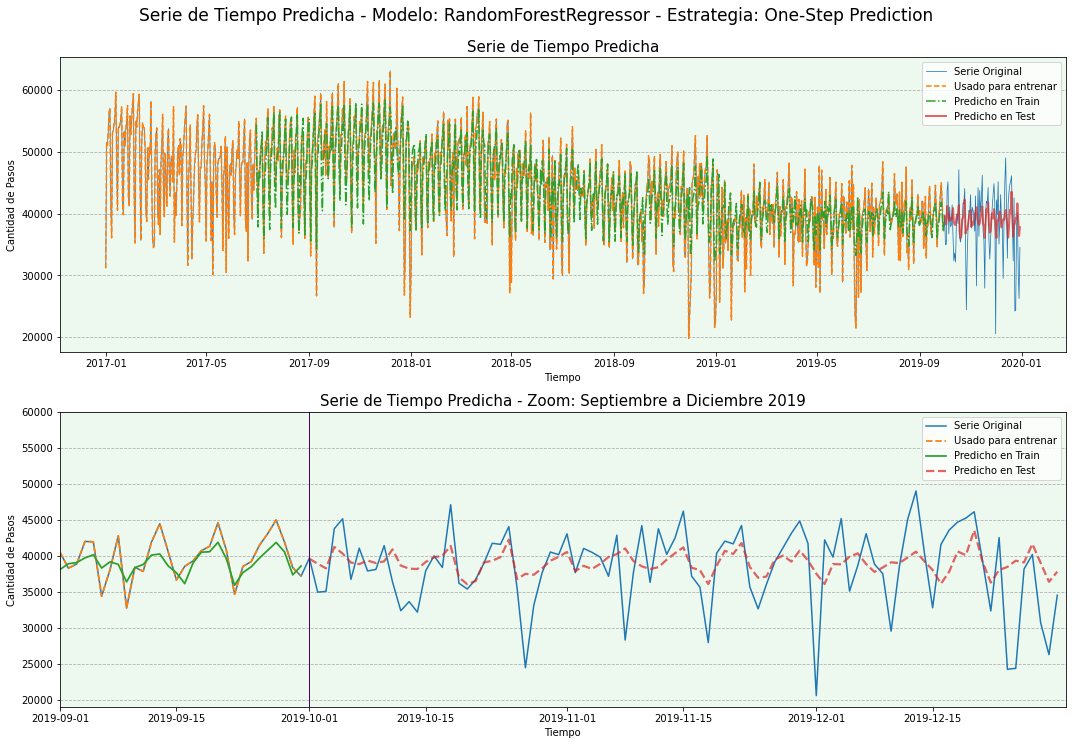

In [73]:
one_step_grafico(senial = senial, 
                 lookback = lookback, 
                 dias_entrenamiento = dias_entrenamiento, 
                 dias_prueba = dias_prueba, 
                 criterio_decision = criterio_decision, 
                 max_depth = max_depth,
                 max_samples = max_samples, 
                 min_samples_leaf = min_samples_leaf)

### Conclusiones sobre los modelos entrenados:
A partir de los resultados obtenidos anteriormente se destaca que: 
- El modelo de RandomForestRegressor bajo la estrategia One-Step Prediction entrenado arroja mejores resultados para la métrica seleccionada (RSME) que el obtenido para el modelo de Benchmark seleccionado. 
- Al modificar algunos de los hiperparámetros del modelo One-Step Prediction, se puede observar que el mismo continúa estando *sobreajustado* pese a haber mejorado su métrica en 649,53 unidades en RMSE (bajando de 4869,74 obtenido con la validación cruzada a 4220,21). 
- Esto puede significar que el modelo es demasiado complejo para predecir estos valores o, bien, que se deben incluir nuevos atributos para lograr explicar de una mejor manera el comportamiento de la cantidad de vehículos que circulan por la autopista Illia en ambos sentidos y que abonan en efectivo. 

### PARTE C: Investigación.
Para continuar con la posible mejora del presente proyecto sería interesante poder incluir las siguientes alternativas: 
1. Incluir las variables categóricas que presenta el dataset (sentido de circulación y tipo de vehículo) con el objetivo de proporcionarle una mayor cantidad de atributos que puedan explicar el comportamiento de la serie de tiempo. Esto, según lo conversado con nuestro tutor, podría realizarse mediante la transformación de las variables categóricas en dummies y luego calcular la proporción de cada uno de ellos. Al resamplear el dataset, el mismo no lo eliminaría y podría agregarse al modelo.
2. Otra alternativa interesante, consiste en evaluar otro modelo, como el desarrollado en el siguiente [artículo](https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/). En él se utiliza la función `MultiOutputRegressor` para realizar las predicciones de los valores futuros pudiendo utilizar las bondades de la regularización al momento de calcular los valores predichos. 
3. Como última alternativa, resultaría interesante incursionar en el armado de un modelo de redes neuronales tal como el que se describe en el artículo: [Pronóstico de Series Temporales con Redes Neuronales en Python](https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/). 

Con estos modelos se espera obtener: 
- Nuevos conocimientos respecto a librerías y modelos nunca antes trabajados. 
- Además, se espera obtener resultados más robustos para la predicción del flujo vehicular en la autopista Illia que se asemejen más a la realidad y sirvan como una herramienta de gestión para este Peaje de la Ciudad de Bs As.


### Referencias: 

-   Brownlee, J. (2017). *4 Strategies for Multi-Step Time Series Forecasting*. Recuperado de: https://machinelearningmastery.com/multi-step-time-series-forecasting/#:~:text=Generally%2C%20time%20series%20forecasting%20describes,time%20steps%20must%20be%20predicted.
-	Brownlee, J. (2020). *A Gentle Introduction to Autocorrelation and Partial Autocorrelation*. Recuperado de: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
-	Cowpertwait P. y Metcalfe A. (2011). *Introductory Time Series with R*. Ed. Springer. Baltimore, USA.
-	Crocker, B. (2019). *How to Predict a Time Series Part 1*. Recuperado de: https://towardsdatascience.com/how-to-predict-a-time-series-part-1-6d7eb182b540
-	Etienne, B. (2019). *Time Series in Python — Exponential Smoothing and ARIMA processes*. Recuperado de: https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788 
-	Jake VanderPlas (2016) *Python Data Science Handbook.* Recuperado de: https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
-	Packt Editorial Staff (2019). *Cross-Validation strategies for Time Series forecasting [Tutorial]*. Recuperado de: https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/
-	Pourya (2019). *Time Series Machine Learning Regression Framework*. Recuperado de: https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a
-	Prabhakaran, S. *Time Series Analysis in Python – A Comprehensive Guide with Examples*. Recuperado de: https://www.machinelearningplus.com/time-series/time-series-analysis-python/ 
-	Radečić, D. (2020). *What is Stationarity in Time Series and why should you care*. Recuperado de: https://towardsdatascience.com/what-is-stationarity-in-time-series-and-why-should-you-care-f3b45082356b
-	Shrivastava, S. (2020) *Cross Validation in Time Series.* Recuperado de: https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4
